In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest
import numpy as np
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib

In [71]:
# df: dataFrame read from files
df = pd.read_csv('../dataset/data1.csv')

In [72]:
df.head()

Date Season    Vụ nuôi module_name    ao  Ngày thả  Time  Nhiệt độ  \
0  21/6/2022  Rainy  Vụ 1-2022          A1  D3N6        69     8     29.53   
1  20/6/2022  Rainy  Vụ 1-2022          A1  D3N6        68     8     29.65   
2  19/6/2022  Rainy  Vụ 1-2022          A1  D3N6        67     8     29.51   
3  18/6/2022  Rainy  Vụ 1-2022          A1  D3N6        66     8     30.51   
4  17/6/2022  Rainy  Vụ 1-2022          A1  D3N6        65     8     30.18   

     pH  Độ mặn  ...    Loại ao  Công nghệ nuôi  Giai doan    area  Giống tôm  \
0  7.33   21.53  ...  Rectangle          Nuôi 1        NaN  1785.0     Vietuc   
1  7.40   21.34  ...  Rectangle          Nuôi 1        NaN  1785.0     Vietuc   
2  7.44   21.18  ...  Rectangle          Nuôi 1        NaN  1785.0     Vietuc   
3  7.50   21.54  ...  Rectangle          Nuôi 1        NaN  1785.0     Vietuc   
4  7.51   21.55  ...  Rectangle          Nuôi 1        NaN  1785.0     Vietuc   

   Số lượng post  Tuổi tôm  Con/Kg  Mực nước  Thay nước (cm)  
0       321750.0     78.00   55.00      75.0             0.0  
1            NaN     79.00     NaN      60.0             0.0  
2            NaN     76.00     NaN      61.0             0.0  
3            NaN     77.00     NaN      61.0            10.0  
4            NaN     74.00     NaN      60.0             0.0  

[5 rows x 59 columns]

In [73]:
df.columns

Index(['Date', 'Season', 'Vụ nuôi', 'module_name', 'ao', 'Ngày thả', 'Time',
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Nhiệt độ.1', 'pH.1', 'Độ mặn.1',
       'TDS.1', 'Độ đục.1', 'DO.1', 'Độ màu.1', 'Độ trong.1', 'Độ kiềm.1',
       'Độ cứng.1', 'Amoni.1', 'Nitrat.1', 'Nitrit.1', 'Phosphate (PO43-).1',
       'Silica.1', 'Canxi.1', 'Kali.1', 'Magie.1', 'F1', 'F2', 'F3', 'F4',
       'F5', 'WQI', 'Loại ao', 'Công nghệ nuôi', 'Giai doan', 'area',
       'Giống tôm', 'Số lượng post', 'Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)'],
      dtype='object')

In [74]:
df.describe()

Ngày thả    Time     Nhiệt độ           pH       Độ mặn  \
count  1179.000000  1179.0  1179.000000  1179.000000  1179.000000   
mean     34.856658     8.0    28.571086     7.844029    28.580958   
std      21.041409     0.0     1.452776     0.328512     5.032944   
min       1.000000     8.0    24.810000     6.970000    15.010000   
25%      17.000000     8.0    27.540000     7.580000    25.125000   
50%      33.000000     8.0    28.760000     7.870000    28.610000   
75%      52.000000     8.0    29.570000     8.035000    31.315000   
max      82.000000     8.0    38.910000     8.810000    38.830000   

               TDS       Độ đục           DO       Độ màu     Độ trong  ...  \
count  1179.000000  1179.000000  1179.000000  1179.000000  1179.000000  ...   
mean     28.552188    48.467846     5.974563   271.248516    28.926972  ...   
std       5.777776    37.037271     0.659902   140.215915     9.612210  ...   
min       0.580000     0.910000     3.520000    14.000000    14.100000  ...   
25%      25.355000    24.145000     5.590000   155.000000    22.000000  ...   
50%      28.440000    38.160000     6.040000   257.000000    26.000000  ...   
75%      30.905000    63.710000     6.440000   365.000000    33.000000  ...   
max      85.540000   386.270000     8.000000  1560.000000    72.000000  ...   

                F2           F3           F4           F5          WQI  \
count  1179.000000  1179.000000  1179.000000  1179.000000  1179.000000   
mean      0.166954     0.046050     0.053412     0.020418     0.655556   
std       0.012088     0.016662     0.006121     0.003650     0.033364   
min       0.109700     0.013800     0.023900     0.002300     0.520000   
25%       0.159600     0.034300     0.050600     0.019200     0.640000   
50%       0.167600     0.042400     0.053900     0.021000     0.660000   
75%       0.175900     0.054800     0.056950     0.022400     0.680000   
max       0.194400     0.107900     0.074900     0.044400     0.760000   

       Giai doan         area  Số lượng post     Mực nước  Thay nước (cm)  
count        0.0  1179.000000   5.000000e+01  1172.000000     1178.000000  
mean         NaN   984.225615   4.441564e+05    90.035870        4.889643  
std          NaN   553.989864   3.257615e+05    16.379774        9.946144  
min          NaN   232.000000   5.525000e+04     0.000000        0.000000  
25%          NaN   834.000000   1.969325e+05    80.000000        0.000000  
50%          NaN   834.000000   4.034500e+05    92.000000        0.000000  
75%          NaN  1785.000000   5.475000e+05   100.000000        5.000000  
max          NaN  1786.000000   1.200000e+06   150.000000       45.000000  

[8 rows x 49 columns]

In [75]:
na = df.isnull().sum()
pd.DataFrame(na[na>0],columns=['NaN'])

NaN
Giai doan       1179
Số lượng post   1129
Con/Kg          1067
Mực nước           7
Thay nước (cm)     1

In [76]:
physic_columns = ['Date','Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)','WQI']

In [77]:
numeric_columns = ['Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Tuổi tôm', 'Mực nước',
       'Thay nước (cm)','WQI']

In [78]:
# df1: dataframe with only specified columns 
df1 = df[physic_columns].copy()

In [79]:
df1.head()

Date  Nhiệt độ    pH  Độ mặn    TDS  Độ đục    DO  Độ màu  Độ trong  \
0  21/6/2022     29.53  7.33   21.53  21.77   39.48  4.54   273.0      19.0   
1  20/6/2022     29.65  7.40   21.34  21.77   38.12  5.02   435.0      19.0   
2  19/6/2022     29.51  7.44   21.18  21.63   37.85  5.16   440.0      19.0   
3  18/6/2022     30.51  7.50   21.54  21.95   29.13  5.21   468.0      19.0   
4  17/6/2022     30.18  7.51   21.55  21.96   25.62  5.07   438.0      20.0   

   Độ kiềm  ...  Phosphate (PO43-)  Silica   Canxi    Kali    Magie  Tuổi tôm  \
0    130.0  ...                7.6    1.84  488.50  370.50   788.00     78.00   
1    119.0  ...                2.7    1.84  328.50  285.50  1017.25     79.00   
2    118.0  ...                5.1    2.28  508.75  371.50   901.00     76.00   
3    115.0  ...                1.2    2.96  454.50  353.50   690.00     77.00   
4    112.0  ...                8.4    9.10  458.75  329.75   806.00     74.00   

   Con/Kg  Mực nước  Thay nước (cm)   WQI  
0   55.00      75.0             0.0  0.64  
1     NaN      60.0             0.0  0.64  
2     NaN      61.0             0.0  0.66  
3     NaN      61.0            10.0  0.65  
4     NaN      60.0             0.0  0.63  

[5 rows x 24 columns]

In [80]:
# convert to numeric, other to NaN
df1[numeric_columns] = df1[numeric_columns].apply(lambda s: pd.to_numeric(s, errors='coerce'))

In [81]:
df1.head()

Date  Nhiệt độ    pH  Độ mặn    TDS  Độ đục    DO  Độ màu  Độ trong  \
0  21/6/2022     29.53  7.33   21.53  21.77   39.48  4.54   273.0      19.0   
1  20/6/2022     29.65  7.40   21.34  21.77   38.12  5.02   435.0      19.0   
2  19/6/2022     29.51  7.44   21.18  21.63   37.85  5.16   440.0      19.0   
3  18/6/2022     30.51  7.50   21.54  21.95   29.13  5.21   468.0      19.0   
4  17/6/2022     30.18  7.51   21.55  21.96   25.62  5.07   438.0      20.0   

   Độ kiềm  ...  Phosphate (PO43-)  Silica   Canxi    Kali    Magie  Tuổi tôm  \
0    130.0  ...                7.6    1.84  488.50  370.50   788.00      78.0   
1    119.0  ...                2.7    1.84  328.50  285.50  1017.25      79.0   
2    118.0  ...                5.1    2.28  508.75  371.50   901.00      76.0   
3    115.0  ...                1.2    2.96  454.50  353.50   690.00      77.0   
4    112.0  ...                8.4    9.10  458.75  329.75   806.00      74.0   

   Con/Kg  Mực nước  Thay nước (cm)   WQI  
0   55.00      75.0             0.0  0.64  
1     NaN      60.0             0.0  0.64  
2     NaN      61.0             0.0  0.66  
3     NaN      61.0            10.0  0.65  
4     NaN      60.0             0.0  0.63  

[5 rows x 24 columns]

In [82]:
df1['Date'] = pd.to_datetime(df1['Date'],format="%d/%m/%Y")

In [83]:
na = df1.isnull().sum()
pd.DataFrame(na[na>0],columns=['NaN'])

NaN
Tuổi tôm          12
Con/Kg          1067
Mực nước           7
Thay nước (cm)     1

In [84]:
# df2: drop all NaN values
df2 = df1.drop(columns="Con/Kg")

In [85]:
# With collumn is not numeric
# notnum_columns = df2.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())


In [86]:
df2.dropna(inplace=True)

In [87]:
df2.shape

(1160, 23)

## Vẽ distribution của các trường dữ liệu

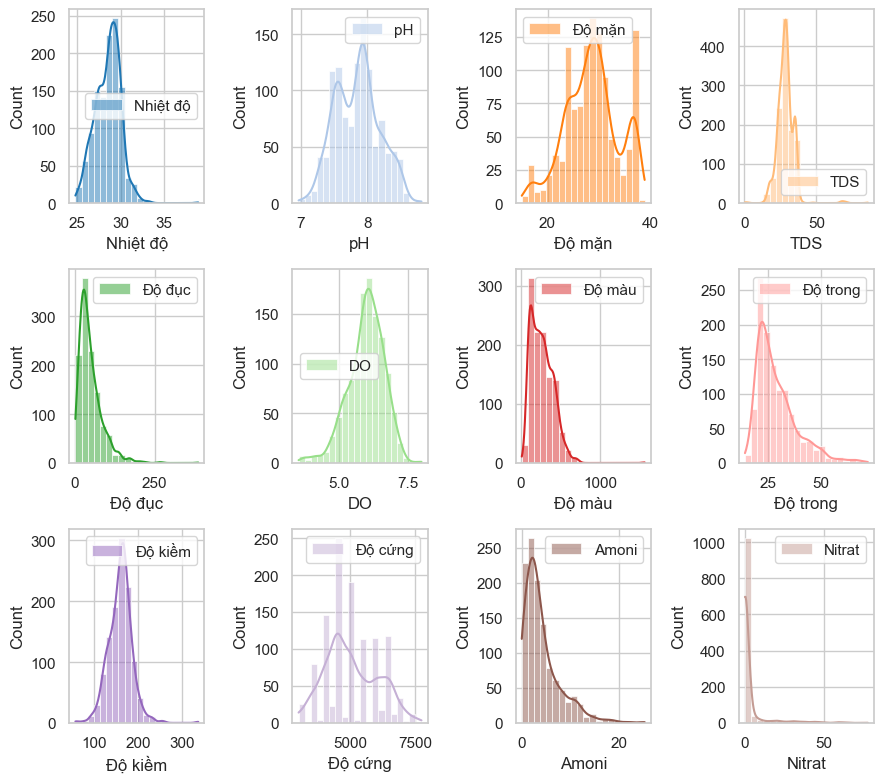

In [187]:
col = numeric_columns[:12]

fig = plt.figure(figsize=(9,8))

for p in range(0,12):
    plt.subplot(3,4,p+1)
    ax = sns.histplot(df2[col[p]],
                      kde=True,
                      bins=20,
                      color=matplotlib.cm.tab20.colors[p],
                      label=col[p])
    plt.legend()
plt.tight_layout()
plt.show()

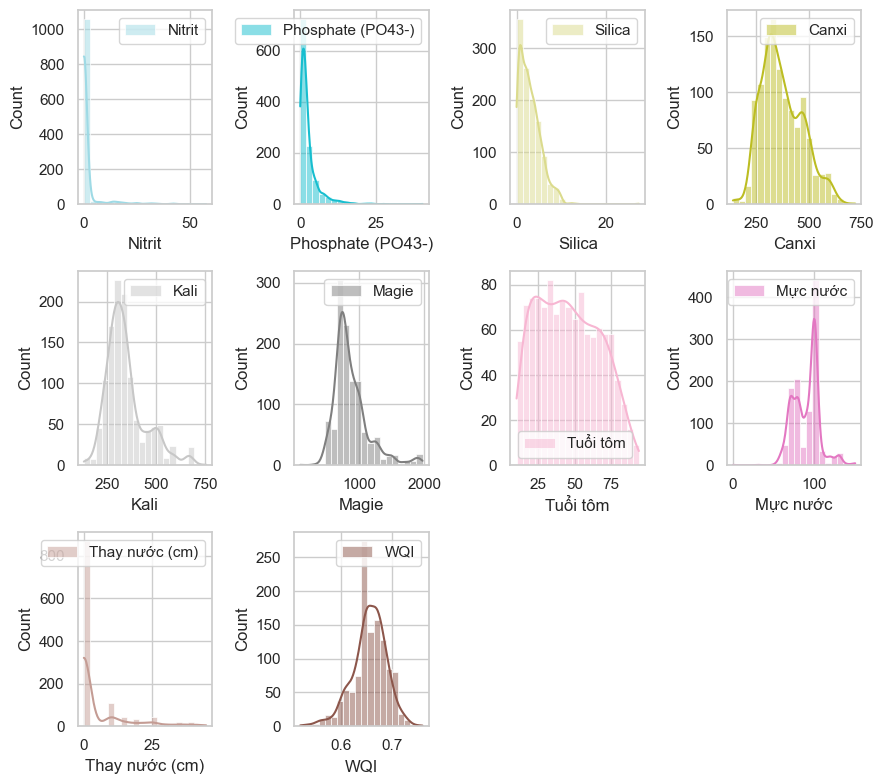

In [188]:
col = numeric_columns[12:]

fig = plt.figure(figsize=(9,8))

for p in range(0,10):
    plt.subplot(3,4,p+1)
    ax = sns.histplot(df2[col[p]],
                      kde=True,
                      bins=20,
                      color=matplotlib.cm.tab20_r.colors[p],
                      label=col[p])
    plt.legend()
plt.tight_layout()
plt.show()

---
Nhận xét:
 - Một số trường dữ liệu có 2 đỉnh: `pH, Độ mặn, TDS, Độ cứng, Canxi, Kali, Magie, Mực nước`
 
---

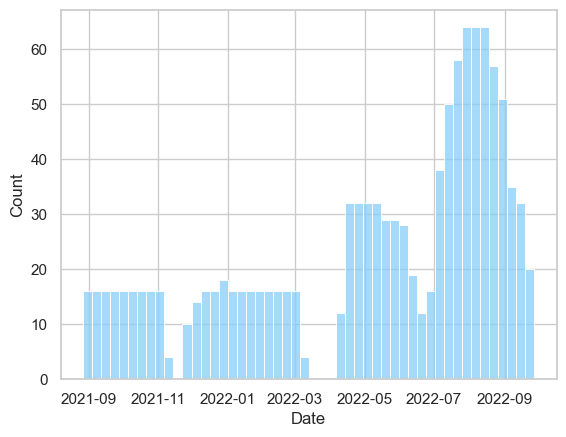

In [189]:
sns.histplot(df2['Date'],
             bins=50,
             color='lightskyblue')
plt.show()

---
* Dữ liệu thu thập không đều theo thời gian

---

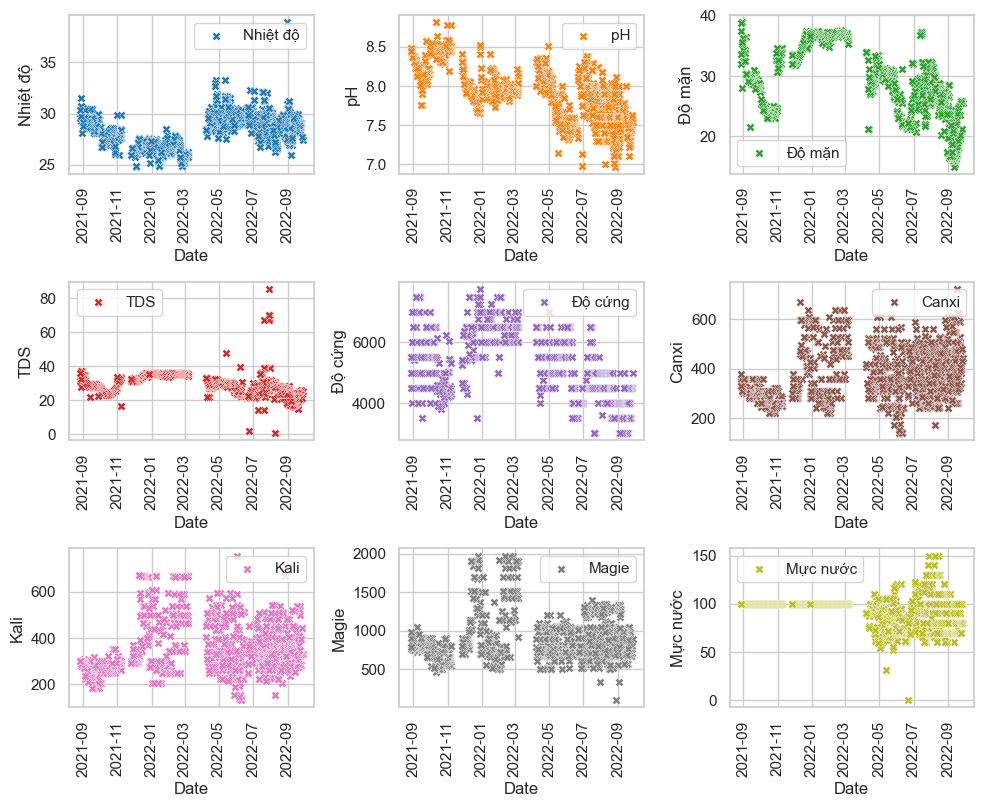

In [178]:
cols = ['Nhiệt độ','pH', 'Độ mặn', 'TDS', 'Độ cứng', 'Canxi', 'Kali', 'Magie', 'Mực nước']
fig = plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

for i,col in enumerate(cols):
    plt.subplot(len(cols)//3+1,3,i+1)
    sns.scatterplot(df2[['Date',col]],
                    x='Date',
                    color=matplotlib.cm.tab10.colors[i],
                    y=col,
                    label=col,
                    marker='X',
                    linewidth=0.3)
    ax = plt.gca()
    xticklabels = ax.get_xticklabels()
    
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels(xticklabels,rotation=90)
    
plt.legend()
plt.tight_layout()
plt.show()

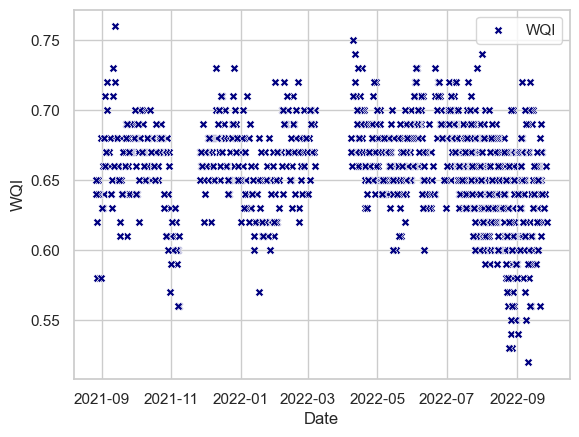

In [194]:
sns.scatterplot(df2,x='Date',y='WQI',
                color='navy',
                marker='X',
                label='WQI')
plt.legend()
plt.show()

In [190]:

# sns.scatterplot(x=df2['Date'],y=df2['pH'],
#                 markers=True,
#                 label='pH',
#                 )
# sns.set_style('whitegrid')
# plt.legend()
# plt.show()

In [180]:
# sns.scatterplot(df2,x='Date',y='TDS',
#                 label='TDS')
# plt.legend()
# plt.show()

In [181]:
# sns.scatterplot(df2,x='Date',y='Độ mặn',
#                 label='Độ mặn')
# plt.legend()
# plt.show()

In [182]:
# sns.scatterplot(df2,x='Date',y='Nhiệt độ',
#                 label='Nhiệt độ')
# plt.legend()
# plt.show()

In [183]:
# sns.scatterplot(df2,x='Date',y='Độ kiềm',
#                 label='Độ kiềm')
# plt.legend()
# plt.show()

## Stardardize data

In [197]:
numeric_columns

['Nhiệt độ',
 'pH',
 'Độ mặn',
 'TDS',
 'Độ đục',
 'DO',
 'Độ màu',
 'Độ trong',
 'Độ kiềm',
 'Độ cứng',
 'Amoni',
 'Nitrat',
 'Nitrit',
 'Phosphate (PO43-)',
 'Silica',
 'Canxi',
 'Kali',
 'Magie',
 'Tuổi tôm',
 'Mực nước',
 'Thay nước (cm)',
 'WQI']

In [201]:
# scale data to mean = 0 and std = 1
# df3: data after scales
sc = StandardScaler()
df3 = pd.DataFrame(sc.fit_transform(df2[numeric_columns]),columns=numeric_columns)
df3.head()

Nhiệt độ        pH    Độ mặn       TDS    Độ đục        DO    Độ màu  \
0  0.674102 -1.580123 -1.407548 -1.177475 -0.242459 -2.189388  0.025815   
1  0.756673 -1.367054 -1.445258 -1.177475 -0.278972 -1.461579  1.182790   
2  0.660340 -1.245300 -1.477013 -1.201625 -0.286221 -1.249301  1.218499   
3  1.348435 -1.062669 -1.405564 -1.146425 -0.520339 -1.173488  1.418470   
4  1.121363 -1.032231 -1.403579 -1.144699 -0.614577 -1.385765  1.204216   

   Độ trong   Độ kiềm   Độ cứng  ...    Nitrit  Phosphate (PO43-)    Silica  \
0 -1.033398 -1.076009 -1.497003  ... -0.151973           1.485492 -0.484026   
1 -1.033398 -1.485173 -1.497003  ... -0.174778           0.033592 -0.484026   
2 -1.033398 -1.522369 -1.008115  ... -0.190566           0.744727 -0.302787   
3 -1.033398 -1.633959 -1.008115  ... -0.227405          -0.410867 -0.022690   
4 -0.929789 -1.745549 -1.497003  ... -0.201091           1.722537  2.506417   

      Canxi      Kali     Magie  Tuổi tôm  Mực nước  Thay nước (cm)       WQI  
0  1.188386  0.257354 -0.345643  1.538450 -0.913770       -0.490731 -0.463615  
1 -0.449574 -0.588736  0.500332  1.585988 -1.829116       -0.490731 -0.463615  
2  1.395690  0.267308  0.071348  1.443376 -1.768093       -0.490731  0.133933  
3  0.840320  0.088136 -0.707281  1.490913 -1.768093        0.513234 -0.164841  
4  0.883828 -0.148271 -0.279220  1.348301 -1.829116       -0.490731 -0.762388  

[5 rows x 22 columns]

In [207]:
def normal_test(data: pd.DataFrame, col: str):
    # Get statistic of collumn
    mean = data[col].mean()
    std = data[col].std()
    median = data[col].median()
    x=np.arange(-5,5,0.01)

    ks_ret = stats.ks_1samp(data[col],stats.norm.cdf,args=(mean,std))

    print(f"KS-Test P-value 1 sample: {ks_ret.pvalue}")
    if ks_ret.pvalue < 0.05:
        print(f"P value < 0.05 => Non-Normal distribution")
    fig = plt.figure(figsize=(5,4))
    sns.histplot(data[col],
                 stat='density',
                 color="#B1E7FF")
    sns.kdeplot(data[col],
                color='navy',
                label=col)
    sns.lineplot(x=x,
                 y=stats.norm.pdf(x,loc=mean,scale=std),
                 color='red',
                 label='normal distribution')

    ax = plt.gca()
    ax.legend()
    plt.show()
    

KS-Test P-value 1 sample: 1.892070757114597e-21
P value < 0.05 => Non-Normal distribution


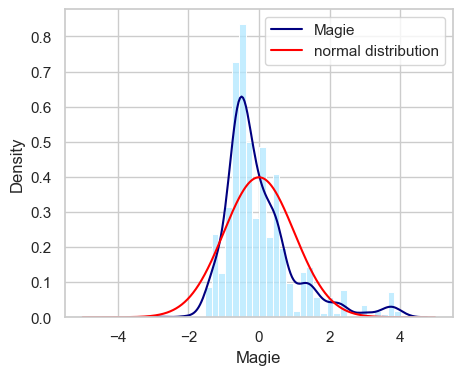

In [208]:
normal_test(df3,'Magie')

KS-Test P-value 1 sample: 1.7087595933719675e-09
P value < 0.05 => Non-Normal distribution


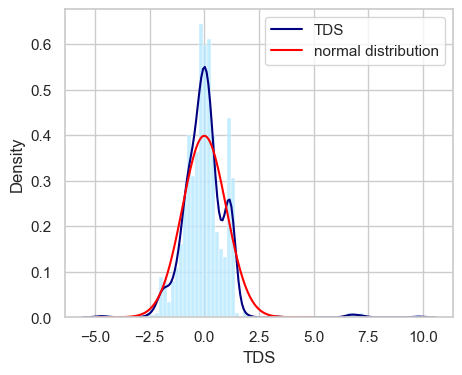

In [209]:
normal_test(df3,'TDS')

KS-Test P-value 1 sample: 2.3218411440667583e-13
P value < 0.05 => Non-Normal distribution


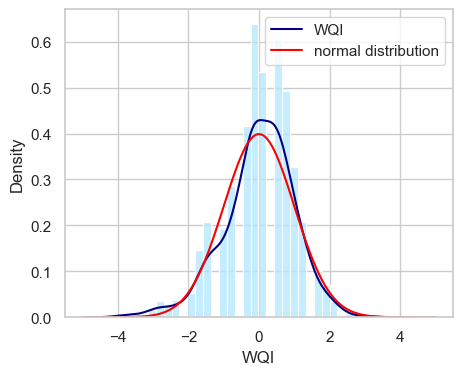

In [210]:
normal_test(df3,"WQI")

KS-Test P-value 1 sample: 0.00013615421043197985
P value < 0.05 => Non-Normal distribution


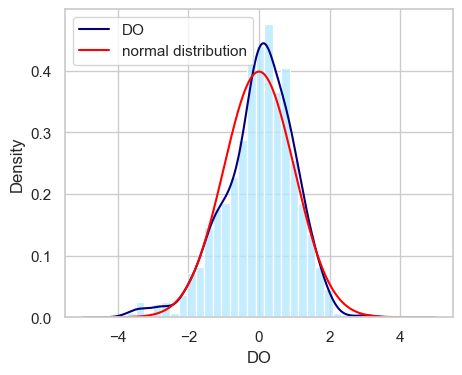

In [211]:
normal_test(df3,"DO")

In [213]:
# for col in df3.columns:
#     normal_test(df3,col)

C:\Users\tnguyen\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


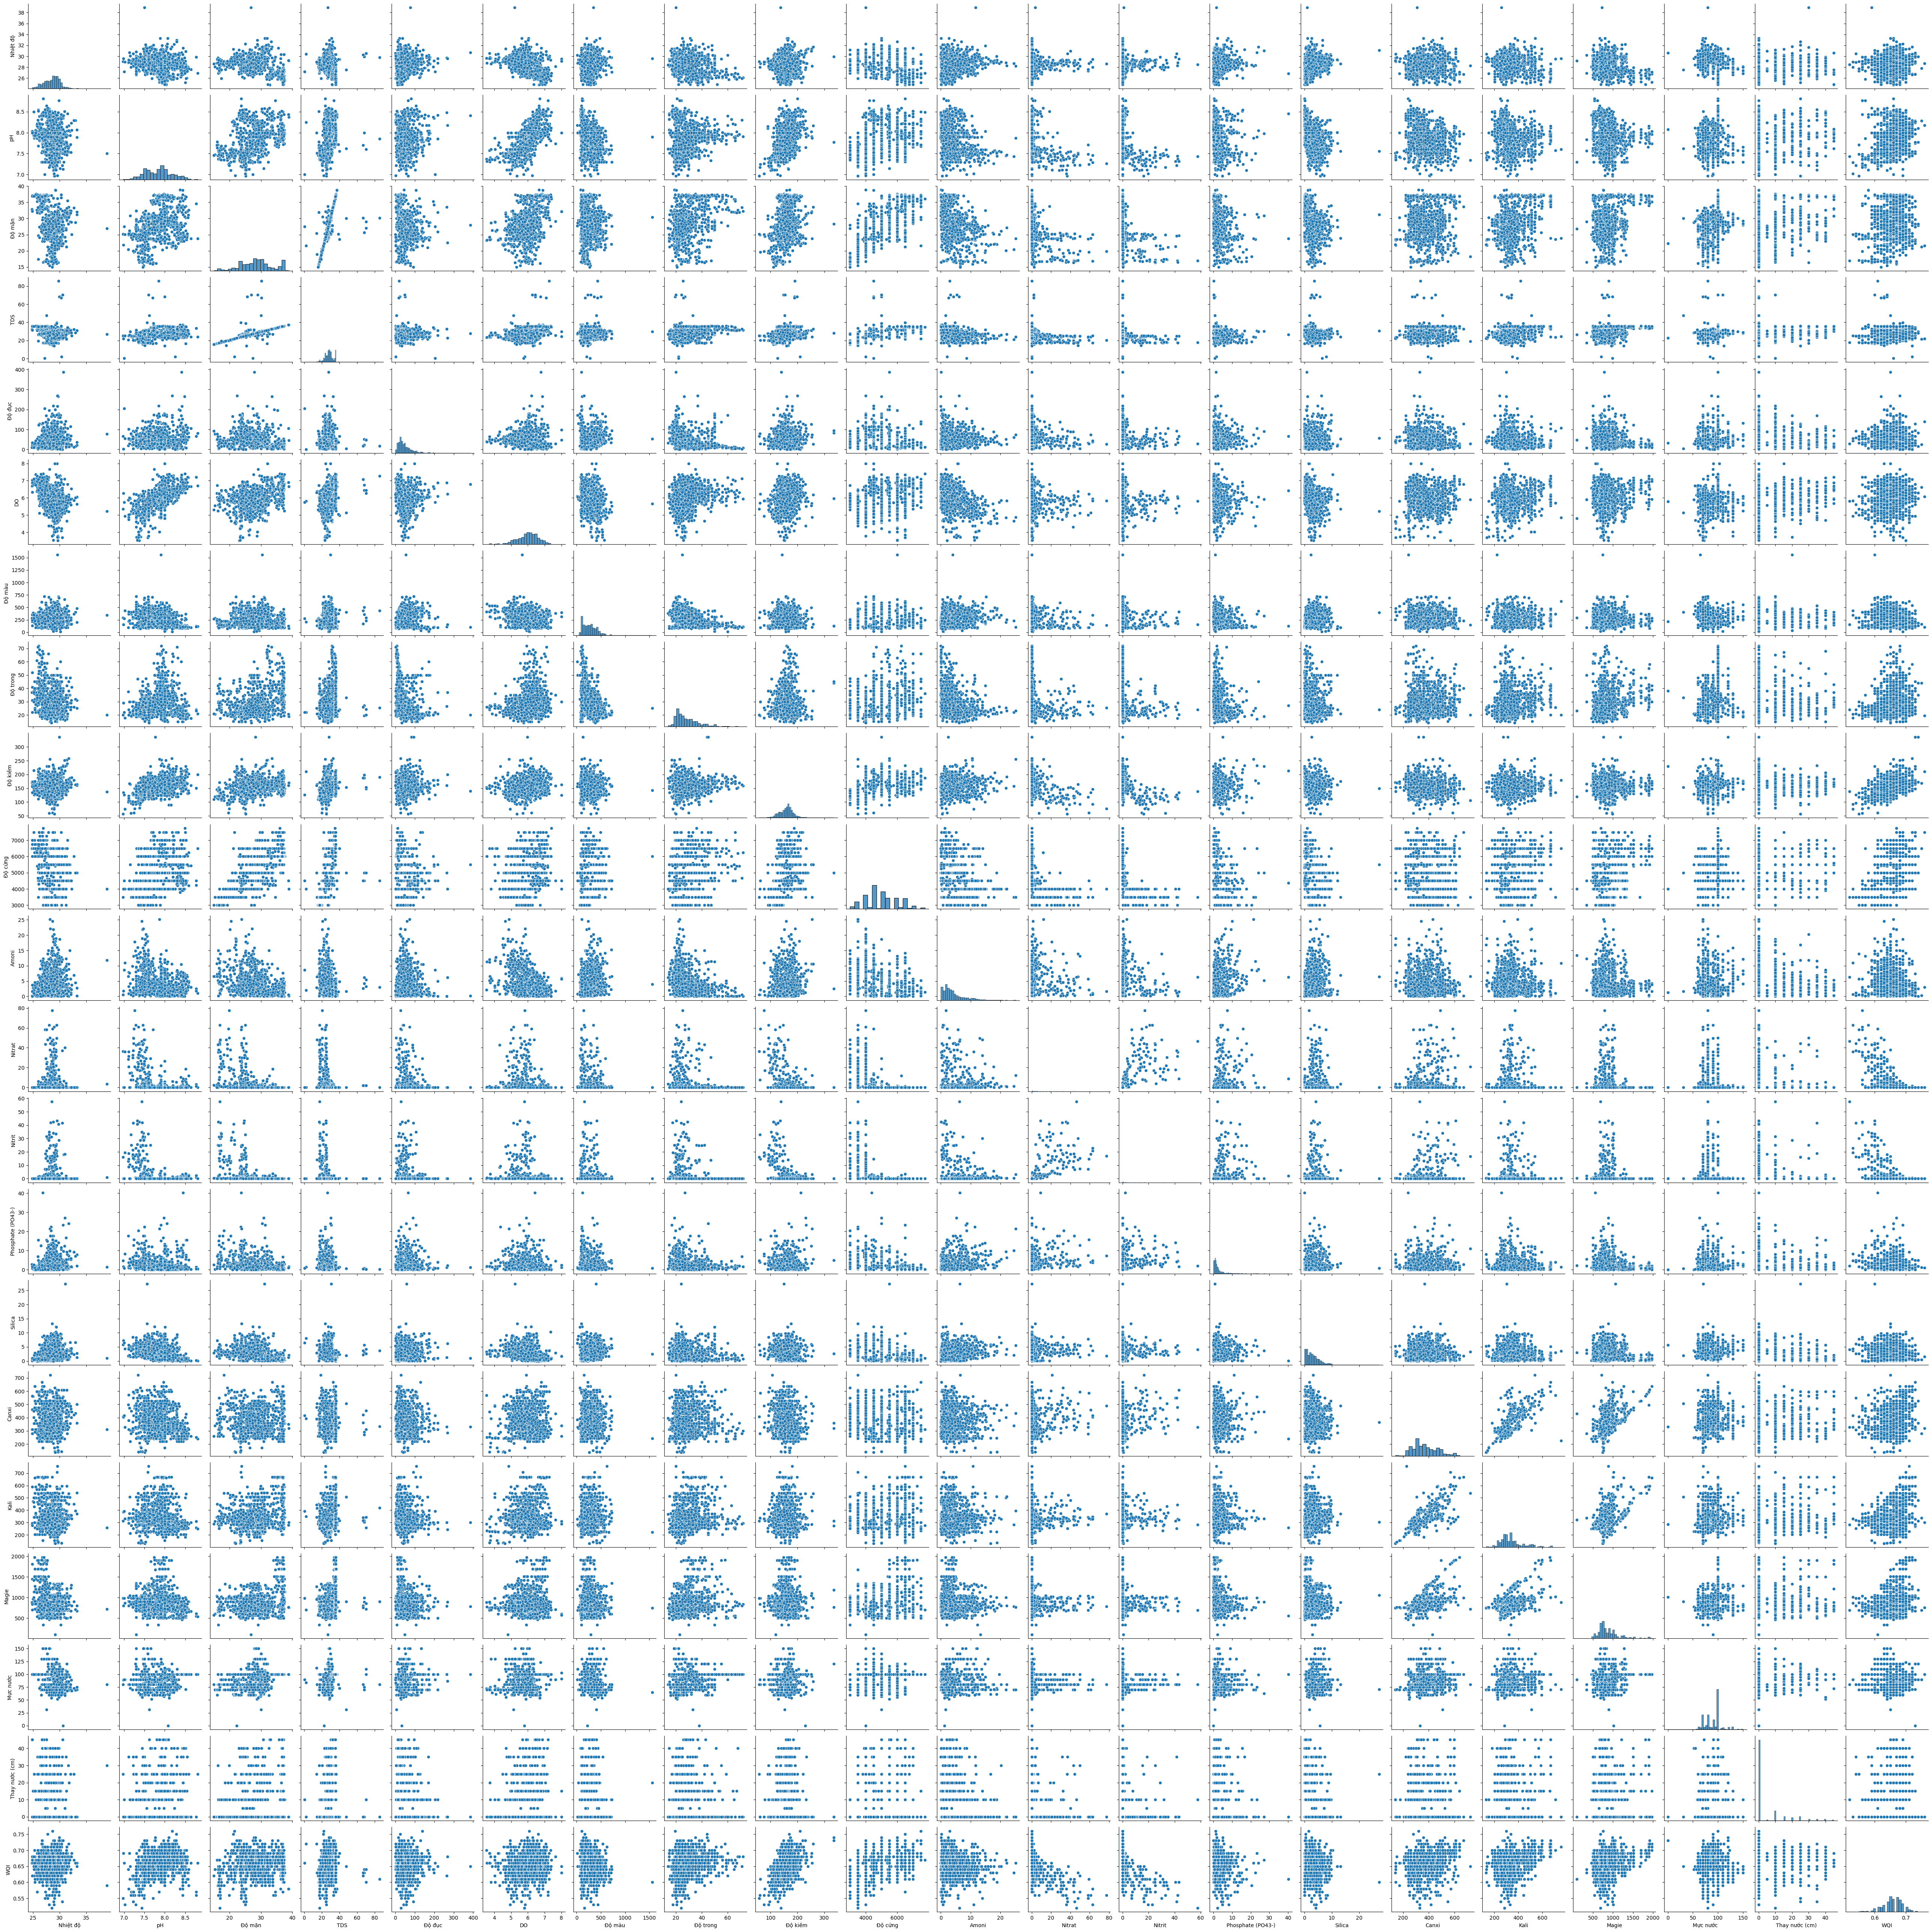

In [127]:
# sns.pairplot(df1)

Nhiệt độ        pH    Độ mặn       TDS    Độ đục        DO    Độ màu  \
0  0.674102 -1.580123 -1.407548 -1.177475 -0.242459 -2.189388  0.025815   
1  0.756673 -1.367054 -1.445258 -1.177475 -0.278972 -1.461579  1.182790   
2  0.660340 -1.245300 -1.477013 -1.201625 -0.286221 -1.249301  1.218499   
3  1.348435 -1.062669 -1.405564 -1.146425 -0.520339 -1.173488  1.418470   
4  1.121363 -1.032231 -1.403579 -1.144699 -0.614577 -1.385765  1.204216   

   Độ trong   Độ kiềm   Độ cứng  ...    Nitrit  Phosphate (PO43-)    Silica  \
0 -1.033398 -1.076009 -1.497003  ... -0.151973           1.485492 -0.484026   
1 -1.033398 -1.485173 -1.497003  ... -0.174778           0.033592 -0.484026   
2 -1.033398 -1.522369 -1.008115  ... -0.190566           0.744727 -0.302787   
3 -1.033398 -1.633959 -1.008115  ... -0.227405          -0.410867 -0.022690   
4 -0.929789 -1.745549 -1.497003  ... -0.201091           1.722537  2.506417   

      Canxi      Kali     Magie  Tuổi tôm  Mực nước  Thay nước (cm)       WQI  
0  1.188386  0.257354 -0.345643  1.538450 -0.913770       -0.490731 -0.463615  
1 -0.449574 -0.588736  0.500332  1.585988 -1.829116       -0.490731 -0.463615  
2  1.395690  0.267308  0.071348  1.443376 -1.768093       -0.490731  0.133933  
3  0.840320  0.088136 -0.707281  1.490913 -1.768093        0.513234 -0.164841  
4  0.883828 -0.148271 -0.279220  1.348301 -1.829116       -0.490731 -0.762388  

[5 rows x 22 columns]

In [15]:
# df1.info()

In [16]:
# df1.isna().sum()

In [215]:
# find outlier (which more than 3 times of standard deviation)
np.where(stats.zscore(df["Magie"])>3)

(array([413, 415, 420, 422, 423, 424, 447, 448, 453, 455, 456, 458, 461,
        478, 480, 481, 483, 487, 491, 493, 497, 502, 505, 549, 551, 552,
        558, 564, 567, 572, 576, 583, 611], dtype=int64),)

In [216]:
df['Magie'].skew()

1.6171387613069546

In [217]:
# fig = plt.figure()
  
# # Plot between -10 and 10 with .001 steps. 
# x_axis = np.arange(-5, 2000, 1 )
  
# ax = sns.lineplot(x=x_axis, 
#                   y=stats.norm.pdf(x_axis, mgMean, mgStd),
#                   color=matplotlib.cm.Pastel2.colors[1]) 

# sns.histplot(df1["Magie"],
#              color='lightskyblue',
#              stat='density',
#              ax=ax)
# sns.kdeplot(df1["Magie"],color='navy')
# plt.show() 

In [218]:
def normal_test(data: pd.DataFrame, col: str):
    # Get statistic of collumn
    mean = data[col].mean()
    std = data[col].std()
#     skew = data[col].skew()
#     print(f"{skew=}")
    median = data[col].median()
    x=np.arange(-5,5,0.01)
    
#     x = np.arange(data[col].min(),
#                   data[col].max(),
#                   (data[col].max()-data[col].min())/2000)
    
    ks_ret = stats.ks_1samp(data[col],stats.norm.cdf,args=(mean,std))
#     ks_ret = stats.ks_1samp(data[col],stats.skewnorm.cdf,args=(skew,mean,std))


    print(f"{ks_ret.pvalue=}")
    fig = plt.figure()
    sns.histplot(data[col],
                 stat='density',
                 color="#B1E7FF")
    sns.kdeplot(data[col],
                color='navy',
                label=col)
    sns.lineplot(x=x,
                 y=stats.norm.pdf(x,loc=mean,scale=std),
                 color='red',
                 label='normal distribution')

#     plt.axvline(x=median)
    ax = plt.gca()
    ax.legend()
    plt.show()
    

In [219]:
def normal_test1(data: pd.DataFrame, col: str):
    # Use standard scaler to turn data into mean = 0, and std = 1
    sc = StandardScaler()
    x= np.array(data[col]).reshape(-1,1)
    print(f"{x.shape=}")
    x = sc.fit_transform(x)
    print(f"{x.shape=}")
    x=np.squeeze(x)
    mode = stats.mode(x).mode
    print(f"{mode=}")
    std = stats.tstd(x)
    
    # Get collum skewness
    skew = stats.skew(x,bias=False)
    print(f"{skew=}")
    
    # Reference distribution, skew normal 
    ks_ret = stats.ks_1samp(x,stats.skewnorm.cdf,args=(skew,0,1))
    
    print(f"{ks_ret.pvalue=}")
    fig = plt.figure()
    sns.histplot(x,
                 stat='density',
                 color="#B1E7FF")
    sns.kdeplot(x,
                color='navy')
    
    sns.lineplot(x=np.arange(-4,4,0.05),
                 y=stats.skewnorm.pdf(np.arange(-4,4,0.05),
                                      a=skew,
                                      loc=0,
                                      scale=1),
                 color='#218B63')

#     plt.show()

ks_ret.pvalue=1.892070757114597e-21


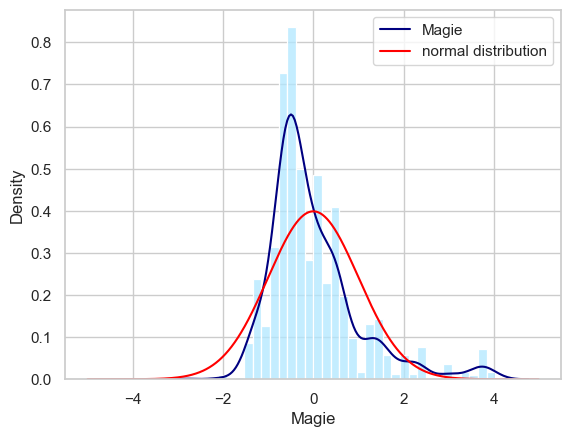

In [220]:
normal_test(df3,'Magie')

ks_ret.pvalue=1.1064606355728588e-08


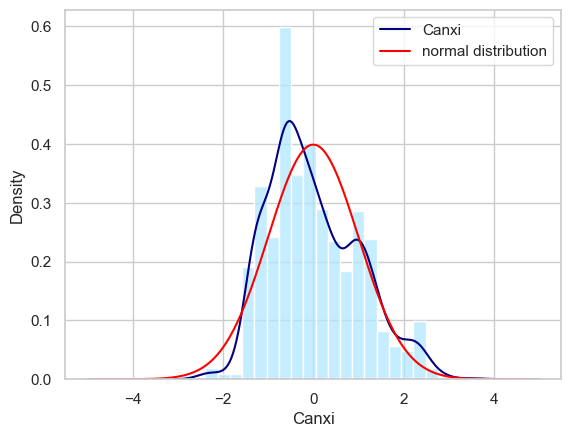

In [221]:
normal_test(df3,'Canxi')

In [222]:
# normal_test1(df1,'Kali')

ks_ret.pvalue=4.542069085795636e-12


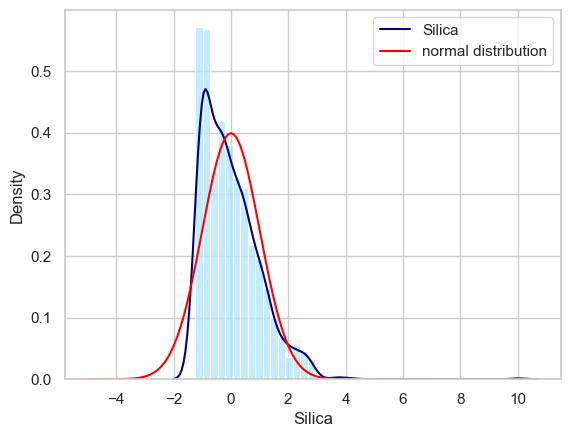

In [223]:
normal_test(df3,'Silica')

In [224]:
# Mg_normtest = normaltest(df1['Magie'])

In [116]:
# Mg_normtest

In [117]:
# kstest_mg = stats.ks_1samp(df1['Amoni'].tolist(),stats.norm.pdf)
# print(kstest_mg.statistic)
# print(kstest_mg.pvalue)

In [118]:
# x=np.arange(-4,4,0.05)
# y = stats.skewnorm.pdf(x,
#                        a=2,
#                        loc=0,
#                        scale=1)

# plt.plot(x,y)
# plt.axvline(np.mean(y))
# plt.show()


In [119]:
# x=np.arange(-4,4,0.05)
# plt.plot(x,
#          stats.norm.pdf(x=x,
#                         loc=0,
#                         scale=1))

In [120]:
# stats.norm.pdf(np.arange(-2,2,0.5),loc=0,scale=1)

In [121]:
# df1['Magie'].skew()

In [134]:
n

1179

In [ ]:
cols = []

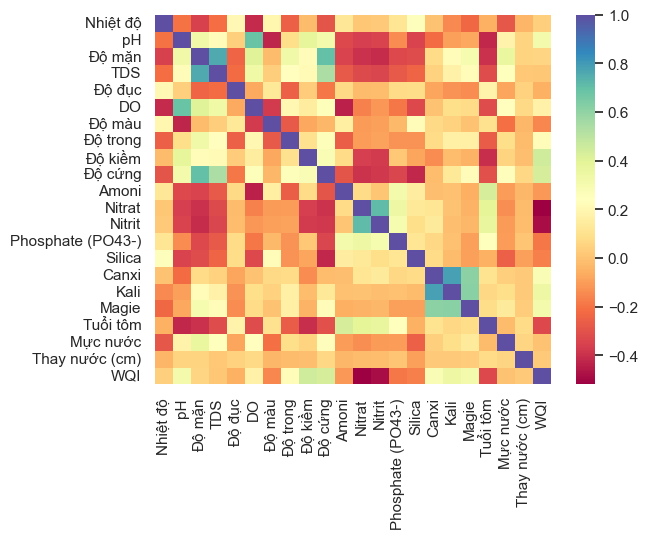

In [230]:
corr = df3.corr(method='pearson')
sns.heatmap(corr,cmap='Spectral')
plt.show()

In [231]:
corr

Nhiệt độ        pH    Độ mặn       TDS    Độ đục        DO  \
Nhiệt độ           1.000000 -0.199997 -0.354994 -0.215230  0.207505 -0.413503   
pH                -0.199997  1.000000  0.324614  0.227564  0.043345  0.687422   
Độ mặn            -0.354994  0.324614  1.000000  0.758531 -0.243366  0.404734   
TDS               -0.215230  0.227564  0.758531  1.000000 -0.220952  0.337532   
Độ đục             0.207505  0.043345 -0.243366 -0.220952  1.000000 -0.073779   
DO                -0.413503  0.687422  0.404734  0.337532 -0.073779  1.000000   
Độ màu             0.196368 -0.426175 -0.022980  0.035750  0.128340 -0.373688   
Độ trong          -0.255724  0.087650  0.332930  0.235027 -0.255341  0.201118   
Độ kiềm           -0.026355  0.378323  0.225474  0.211057  0.029722  0.147580   
Độ cứng           -0.291644  0.315983  0.697640  0.538468 -0.190028  0.262064   
Amoni              0.123072 -0.332920 -0.348929 -0.279598  0.070264 -0.437810   
Nitrat             0.012298 -0.359046 -0.398968 -0.326897 -0.023155 -0.163550   
Nitrit             0.023675 -0.351957 -0.407653 -0.336348 -0.017870 -0.121060   
Phosphate (PO43-)  0.119880 -0.142202 -0.329912 -0.281495  0.079126 -0.188007   
Silica             0.254828 -0.352759 -0.320614 -0.240723  0.085401 -0.330231   
Canxi              0.001297 -0.219821  0.077807  0.045655 -0.082629  0.001235   
Kali              -0.149264 -0.092762  0.228316  0.173277 -0.121584  0.089323   
Magie             -0.230273 -0.077399  0.304085  0.226816 -0.139442  0.078554   
Tuổi tôm          -0.053219 -0.421638 -0.400120 -0.321303  0.179090 -0.318259   
Mực nước          -0.286755  0.176708  0.365726  0.250545 -0.084291  0.240332   
Thay nước (cm)    -0.042019  0.050985  0.055306  0.019337  0.049077  0.069364   
WQI                0.043684  0.311855  0.060970  0.011486 -0.050940  0.170416   

                     Độ màu  Độ trong   Độ kiềm   Độ cứng  ...    Nitrit  \
Nhiệt độ           0.196368 -0.255724 -0.026355 -0.291644  ...  0.023675   
pH                -0.426175  0.087650  0.378323  0.315983  ... -0.351957   
Độ mặn            -0.022980  0.332930  0.225474  0.697640  ... -0.407653   
TDS                0.035750  0.235027  0.211057  0.538468  ... -0.336348   
Độ đục             0.128340 -0.255341  0.029722 -0.190028  ... -0.017870   
DO                -0.373688  0.201118  0.147580  0.262064  ... -0.121060   
Độ màu             1.000000 -0.280976 -0.075983 -0.035400  ... -0.096582   
Độ trong          -0.280976  1.000000  0.098428  0.260803  ... -0.089901   
Độ kiềm           -0.075983  0.098428  1.000000  0.286488  ... -0.375593   
Độ cứng           -0.035400  0.260803  0.286488  1.000000  ... -0.381321   
Amoni              0.158651 -0.259016  0.078743 -0.289356  ...  0.007959   
Nitrat            -0.104703 -0.099268 -0.359402 -0.393516  ...  0.714572   
Nitrit            -0.096582 -0.089901 -0.375593 -0.381321  ...  1.000000   
Phosphate (PO43-) -0.028975 -0.123211  0.019329 -0.339894  ...  0.303495   
Silica             0.225892 -0.125870 -0.081277 -0.419259  ...  0.086959   
Canxi              0.070407  0.074863 -0.141703 -0.016809  ...  0.134935   
Kali               0.049961  0.165760 -0.020317  0.132022  ... -0.011891   
Magie             -0.001790  0.167752 -0.047460  0.222002  ... -0.034005   
Tuổi tôm           0.101746 -0.264710 -0.403894 -0.307542  ...  0.374348   
Mực nước          -0.205723  0.088089  0.055116  0.229068  ... -0.104422   
Thay nước (cm)    -0.033162 -0.023802 -0.011716  0.064600  ... -0.016461   
WQI               -0.154318  0.221484  0.453046  0.435606  ... -0.485402   

                   Phosphate (PO43-)    Silica     Canxi      Kali     Magie  \
Nhiệt độ                    0.119880  0.254828  0.001297 -0.149264 -0.230273   
pH                         -0.142202 -0.352759 -0.219821 -0.092762 -0.077399   
Độ mặn                     -0.329912 -0.320614  0.077807  0.228316  0.304085   
TDS                        -0.281495 -0.240723  0.045655  0.173277  0.226816   
Độ đục

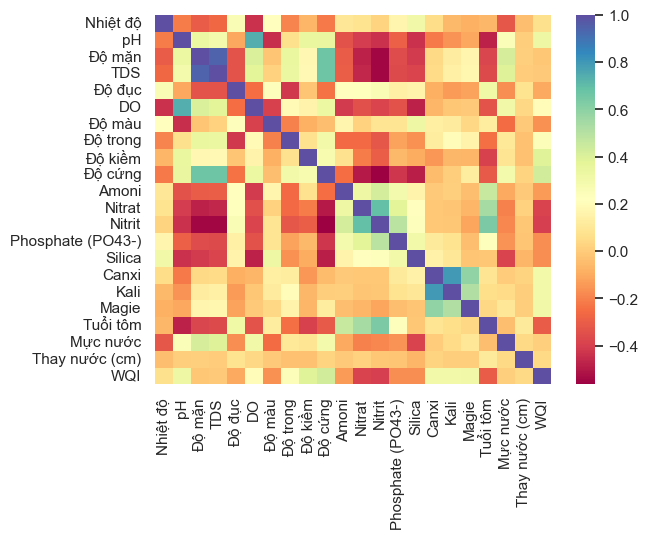

In [229]:
corr1 = df3.corr(method='spearman')
sns.heatmap(corr1,cmap='Spectral')
plt.show()

<Axes: >

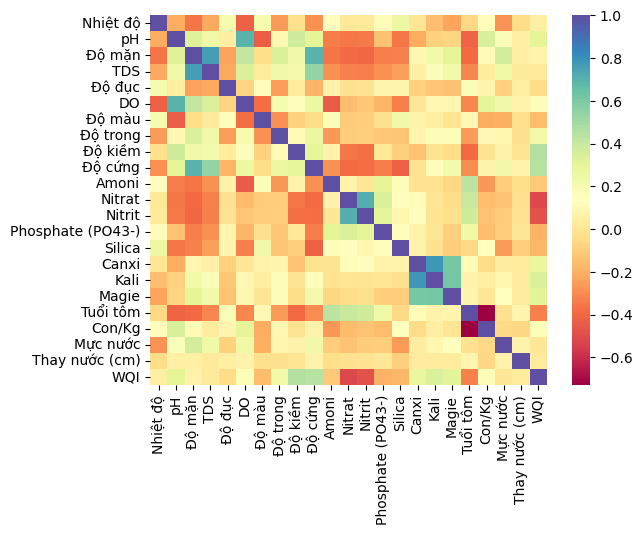

In [30]:
sns.heatmap(df1.corr(),
            cmap='Spectral')